# Assignment 0: Data Exploration

Your UTCS accounts come with `python` installed but you can’t add packages to it (without root). Especially installing `scipy` and `numpy` on your own can be painful. We recommend using a local install of python, so that you can add any packages you need easily. We will use the python 3 version of [Anaconda](https://docs.continuum.io/), an open-source package and environment manager optimized for data science applications. It’s maintained by the Austin-based company Anaconda.

## Part 1: Setting up your Jupyter Notebook

You may have unforeseen difficulties with this portion of the assignment (not enough disk space, issues with permissions or package versions, conflicts with your personal `.bashrc` or `.zshrc` etc). 
**Please start early** and work with the TAs (during office hours) or other classmates to resolve these.

### Installing Anaconda on personal computers

* Make sure you have 2.5 GB free space available before you start installing. Use `baobab` to clear unused files and Chrome’s `.config` litter.
* Download the Anaconda - Python 3.6 zip archive from the [official website](https://www.anaconda.com/download/#download). This file is `~500 MB`, and the uncompressed version will be `~2 GB`.

~~~~
$ wget https://repo.continuum.io/archive/Anaconda3-4.4.0-Linux-x86_64.sh
# current as of this assignment
$ bash Anaconda3-4.4.0-Linux-x86_x64.sh
~~~~

* Accept the license agreement and select an installation directory. (Note that the install location defaults to `~/anaconda3`)
* It will take a few minutes to install. Please be patient.
* It will ask you whether to add it to your bash path (your `~/.bashrc` file). Note that the default is “no”. We recommend saying **yes**.
* Start a **new terminal**. Let’s make sure we’re using Anaconda’s Python we just installed.

~~~~
$ which python
/u/pkar/anaconda3/bin/python
# Note:- your username will appear in the path. Mine is 'pkar'.
~~~~

* Let’s start a notebook server.

~~~~
$ jupyter notebook
~~~~

* It should open a browser tab and start a local server.

<img src="imgs/screen1.png">

* Create a directory for this course (I called mine CS363), and make a new Python 3 notebook.
* Have a go at using the notebook interface. We’ll see more of what we can do with Jupyter notebooks in Part 2.

### Installing Jupyter notebooks on lab computers

The Anaconda install is too large for your allocated space in the computer lab. But you can still install Jupyter in the lab without installing Anaconda.

First log into your favorite cs linux machine. Almost all required packages are already installed on those machines.

~~~~
pip3 install --user jupyter
~~~~

Let’s fire up jupyter:

~~~~
ipython3 notebook --no-browser
~~~~

If you’re logged in locally open a browser at the url printed out. Otherwise port forward

~~~~
ssh -NL PORT:localhost:PORT SERVER
~~~~

You can figure out the `PORT` from the url provided by ipython. `SERVER` is the url of the machine you started ipython on.

Pro tip: If you want ipython to survive your SSH login, start it in a screen session.

*Note: This guide is inspired from Prof. Philip Krähenbühl's Neural Network course ([CS 342](http://www.philkr.net/cs342/homework/01/install.html)).*

### Additional Links

* [Stanford CS 231N iPython Tutorial](http://cs231n.github.io/ipython-tutorial/)
* [Jupyter Notebook Beginner Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/)
* [Datacamp Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.PV0TCww)

## Part 2: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [20]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__

'0.23.4'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [21]:
#initialize the data set
leaf_data = pd.read_csv("leaf.csv")

#display the head of the dataset 
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [22]:
# This code takes the data frame and outputs the number of NaN results present in each column.
print()
print(leaf_data.isna().sum())

#display the number of missing values in the eccentricity column 
num_missing = leaf_data.isna().sum()['eccentricity'] 
print()
print("The number of missing eccentricity values is " + str(num_missing) + ".")



class                        0
eccentricity                 5
aspect-ratio                 0
elongation                   0
solidity                     0
stochastic-convexity         0
isoperimetric-factor         0
maximal-indentation-depth    0
lobedness                    0
average-intensity            0
average-contrast             0
smoothness                   0
third-moment                 0
uniformity                   0
entropy                      0
dtype: int64

The number of missing eccentricity values is 5.


Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [23]:
#import relevant method from relevant package
from statistics import mean

#impute missing values with the mean
#the mean was chosen as it would not affect the data in any way that would skew the overall set.
leaf_data['eccentricity'].fillna(value = leaf_data['eccentricity'].mean(), inplace = True)

#display head
leaf_data.head()


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Standardize the `eccentricity` column. Where `value_std = (value - mean(value)) / std(value)`. Display the head of the new data frame.

In [24]:
#import relevant method from relevant package
from numpy import std

#calculate values for standardization 
mean_x = leaf_data['eccentricity'].mean()
std_x = leaf_data['eccentricity'].std()

#standardize eccentricity and add it as the last column 
leaf_data['eccentricity_std'] = (leaf_data['eccentricity'] - mean_x)/ std_x
leaf_data.head()


,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy,eccentricity_std
0,1,0.567526,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000,4.578673e-16
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514,1.763441e+00
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110,-1.545119e+00
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809,-1.872588e-01
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660,-9.691060e-01


Q4. Plot a scatter plot between `smoothness` and standardized `eccentricity`. Place `smoothness` on the X axis.

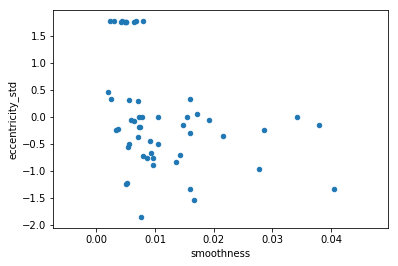

In [25]:
leaf_data.plot.scatter(x = 'smoothness' , y = 'eccentricity_std')


Q5. Now plot the same scatter plot as Q8 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

Text(0, 0.5, 'Standardized eccentricity')

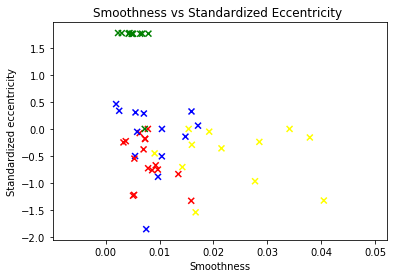

In [26]:
#set color pairings
colors = {1 : 'red' , 2:'blue' , 3:'yellow' , 4:'green'}

#plot and modify chart 
plt.scatter( leaf_data['smoothness'],  leaf_data['eccentricity_std'] , c = leaf_data['class'].apply( lambda x: colors[x]) , marker = 'x')
plt.title("Smoothness vs Standardized Eccentricity ")
plt.xlabel('Smoothness')
plt.ylabel('Standardized eccentricity')

#Upon initial observation, there is a very little correlation between smoothness and eccentricity for group 3 , represented
#by the yellow points on the plot. Conversely, there is a a very strong positive correlation between Smoothness and Eccentricity for group 4 
#represented by the green points plotted. Additionally there is not any notable correlation between smoothness and 
#standardized eccentricity for groups 1 or 2, respresented by red and blue respectively. In general, I would assum that 
#there is no correlation between standarzied eccentricity and smoothness as te correlations displayed are fairly weak 
#if at all present.

Q6. Calculate the correlation between the standardized `eccentricity` and the `smoothness` column. 

In [27]:
#calculate correlation
correlations = leaf_data.corrwith(leaf_data['eccentricity_std'])
print()
print(" The correlation between eccentricity and smoothness is " + str(correlations[11]) + ".")


 The correlation between eccentricity and smoothness is -0.35441842207550006.


Q7. Create a plot to determine if there are any outliers in the `average-contrast` attribute.


There are two outliers on the high end denoted by the circles past the whisker at 0.19.


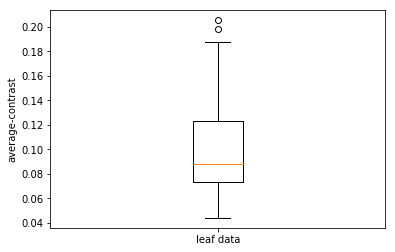

In [28]:
plt.boxplot(leaf_data['average-contrast'] , labels = ['leaf data'])
plt.ylabel('average-contrast')

print()
print('There are two outliers on the high end denoted by the circles past the whisker at 0.19.')

## Part 3: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [29]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
# display data types of various columns in a dataframe
adult_data.dtypes



age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q8. Show the distribution of the dataset with respect to the `education` column. Choose a plot that is suitable to show this.

HS-grad         10501
Some-college     7291
Bachelors        5355
High-school      3055
Masters          1723
Assoc-voc        1382
Elem-school      1147
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Preschool          51
Name: education, dtype: int64


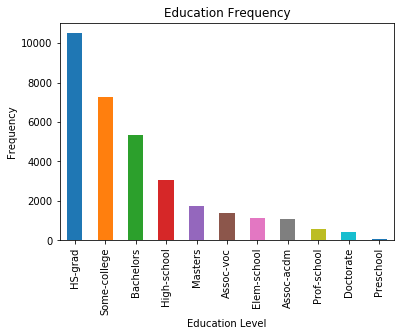

In [31]:

adult_edu_data = adult_data['education'].value_counts()
#bar graphs are useful for comparing values of categorical variables
adult_edu_data.plot(kind = 'bar' , title = 'Education Frequency')

plt.ylabel('Frequency')
plt.xlabel('Education Level')
print(adult_edu_data)

Q9.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [32]:

marital_data = adult_data.groupby(by = 'marital-status' , sort = False , observed = True )[['hours-per-week']]

#preserve relvant dataframe for manipulation 
marital_stats = marital_data.describe()

#clean output
del marital_stats[('hours-per-week' ,'count')]
print(marital_stats)

#The marital status that has the highest average number of work hours per week is married-civ-spouse, 
#with 43.28 hours of work per week
#The marital status that has the highest varaibility in hours of work per week is 
#married-af-spouse with a standard deviation of 19.4405 hours 

                      hours-per-week                                        
                                mean        std  min   25%   50%   75%   max
marital-status                                                              
Never-married              36.939998  12.432542  1.0  30.0  40.0  40.0  99.0
Married-civ-spouse         43.284856  11.905047  1.0  40.0  40.0  50.0  99.0
Divorced                   41.246680  10.676632  1.0  40.0  40.0  45.0  99.0
Married-spouse-absent      39.669856  11.767374  3.0  37.0  40.0  40.0  99.0
Separated                  39.301463  10.377534  2.0  37.0  40.0  40.0  99.0
Married-AF-spouse          41.130435  19.440596  3.0  39.0  40.0  47.0  90.0
Widowed                    32.979859  14.058690  1.0  21.0  40.0  40.0  99.0


In [33]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q10. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes. Display the head of the new dataframe.

In [34]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
# your code goes here
adult_data_copy['continent'] = adult_data_copy['native-country'].map(continent_dict)
adult_data_copy.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Use matplotlib to plot a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot.
<img src="imgs/screen3.png">

Text(0, 0.5, 'Age')

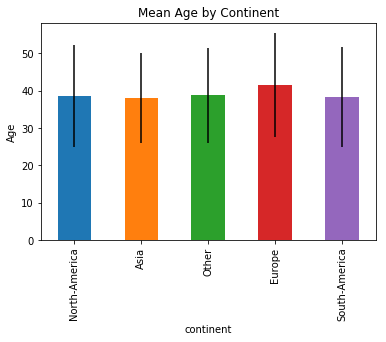

In [35]:
#group by appropriate column
adult_cont = adult_data_copy.groupby(by = 'continent' , sort = False , observed = True )

#plot data and edit the plot labels 
adult_cont['age'].mean().plot( kind = 'bar'  , yerr = adult_cont.std())
plt.title('Mean Age by Continent')
plt.ylabel('Age')


Q12. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [37]:
#Explain why here (as a comment):
adult_data_copy = adult_data.copy()
print("Standard Deviation of Continuous Attributes")
print(adult_data_copy.std())
print()
print('Number of Labels for Categorical Attributes')
print()
print( "The number of education labels is " + str(len(adult_data_copy["education"].value_counts())))
print()

print( "The number of race labels is " + str(len(adult_data_copy["race"].value_counts())))
print()

print( "The number of marital status labels is " + str(len(adult_data_copy["marital-status"].value_counts())))
print()

print( "The number of work class labels is " + str(len(adult_data_copy["workclass"].value_counts())))

#The features that I would remove from the data set are the ones with the lowest variance as these features 
#will tell us the least about the different entries. Here, I measure the standard deviation of the numerical attributes
#and after observation would remove education um and possibly hours-per-week as they have the lowest standard deviation, which
#implies their values are fiarly similar and do not therefore contain much information about differences.
#Conversely for categorical variables, I would remove possibly education labels as this label has the most number of values
# ,some of which may occur rarely and therefore slow down the algorithm. 
     

Standard Deviation of Continuous Attributes
age                   13.640433
fnlwgt            105549.977697
education-num          2.572720
capital-gain        7385.292085
capital-loss         402.960219
hours-per-week        12.347429
dtype: float64

Number of Labels for Categorical Attributes

The number of education labels is 11

The number of race labels is 5

The number of marital status labels is 7

The number of work class labels is 9
